In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
#from pls_m4 import h_ab, h_c, t_ab, t_c
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

In [2]:
params_df = pd.read_csv('final_data_files/omegacen_fit_params.csv')
params_df.slope_ab[params_df.wavelength == 1.22].values

array([-2.55329952])

In [3]:
# read in dataframe
df = pd.read_csv('final_data_files/all_data.csv')#_clipped.csv')

# show column names for reference
print df.columns.values

df['log_per'] = np.log10(df.per)

print np.min(df.photfeh), np.max(df.photfeh)

def add_nums(df, feh_name):
    df.loc[500]=np.zeros(23)
    df.loc[501]=np.zeros(23)
    df.loc[502]=np.zeros(23)
    df.loc[503]=np.zeros(23)
    df.loc[500, feh_name] = -0.88
    df.loc[501, feh_name] = -2.12
    df.loc[502, feh_name] = -0.88
    df.loc[503, feh_name] = -2.12
    df.loc[502, 'type'] = 1
    df.loc[503, 'type'] = 1
    return df

df = add_nums(df, 'photfeh')

['id' 'type' 'per' 'mag_j' 'merr_j' 'mag_h' 'merr_h' 'mag_k' 'merr_k'
 'mag_3' 'merr_3' 'mag_4' 'merr_4' 'resid_all_j' 'resid_all_h'
 'resid_all_k' 'resid_all_3' 'resid_all_4' 'photfeh' 'photfeh_err'
 'spectfeh' 'spectfeh_err']
-2.21 -0.9


In [50]:
def plot_color_pl(df,params_df,band,wav,band_label):
    df_ab = df[df.type==0]
    df_c = df[df.type==1]
    fig, ax1 = plt.subplots(1,1,figsize=(7,5))
    ppl.plot(ax1, df_ab.log_per, df_ab['mag_'+band], 'o', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
    ppl.plot(ax1, df_c.log_per, df_c['mag_'+band], '^', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
    s1 = ax1.scatter(df.log_per, df['mag_'+band], c=df.photfeh, s=0, lw=0.1, cmap='RdBu')
    ax1.scatter(df_ab.log_per, df_ab['mag_'+band], c=df_ab.photfeh, s=35, lw=0.5, cmap='RdBu')
    ax1.scatter(df_c.log_per, df_c['mag_'+band], c=df_c.photfeh, marker='^', s=35, lw=0.5, cmap='RdBu')
    
    if band == 'j':
        ax1.set_ylim(14.45,12.75)
    else:
        ax1.set_ylim(14.4,12.1)
    ax1.set_xlim(-0.65, 0.04)
    ax1.set_ylabel('Apparent ${}$ magnitude'.format(band_label))
    ax1.set_xlabel('$\log P$ (days)')
    
    params = params_df[params_df.wavelength==wav]
    slope_ab,zpt_ab = params.slope_ab.values,params.zpt_ab.values
    slope_c,zpt_c = params.slope_c.values,params.zpt_c.values
    x_ab = np.linspace(-0.32, 0.01, 2)
    x_c = np.linspace(-0.62, -0.26, 2)
    p0_ab = -0.193749921292
    p0_c = -0.442896323087
    ax1.plot(x_ab,slope_ab*(x_ab-p0_ab)+zpt_ab,'k-')
    ax1.plot(x_c,slope_c*(x_c-p0_c)+zpt_c,'k-')
    ax1.plot(x_ab,slope_ab*(x_ab-p0_ab)+zpt_ab+np.nanstd(df_ab['resid_all_'+band]),'k--')
    ax1.plot(x_c,slope_c*(x_c-p0_c)+zpt_c+np.nanstd(df_c['resid_all_'+band]),'k--')
    ax1.plot(x_ab,slope_ab*(x_ab-p0_ab)+zpt_ab-np.nanstd(df_ab['resid_all_'+band]),'k--')
    ax1.plot(x_c,slope_c*(x_c-p0_c)+zpt_c-np.nanstd(df_c['resid_all_'+band]),'k--')
    
    x_range = ax1.get_xlim()[0] - ax1.get_xlim()[-1]
    y_range = ax1.get_ylim()[0] - ax1.get_ylim()[1]
    ax1.text(ax1.get_xlim()[0] - x_range*0.025, ax1.get_ylim()[1] + y_range*0.03,
             '${}$'.format(band_label), ha='left', va='top', fontsize=16)
    
    fig.tight_layout()
    pos1 = ax1.get_position()
    minus_factor = 0.12
    pos1.x1 -= minus_factor
    ax1.set_position(pos1)
    cax = fig.add_axes([0.99 - minus_factor, pos1.y0, 0.02, (pos1.y1 - pos1.y0)])
    fig.colorbar(s1, cax=cax, ticks=np.arange(-2.1,-0.9,0.2), label='[Fe/H] (dex)')

    fig.savefig('final_plots/color_coded_pl_{}.pdf'.format(band))


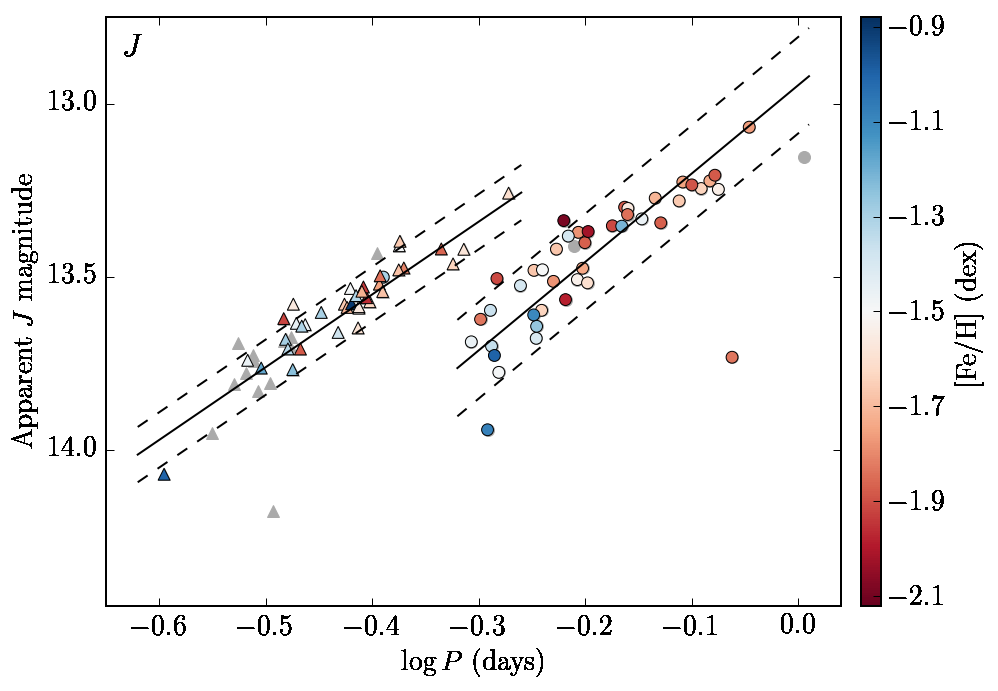

In [55]:
plot_color_pl(df, params_df, 'j', 1.22, 'J')